In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../..')
from src import raw_data_path, direcslist, load_image, ImageQuant2
np.random.seed(12345)
%matplotlib widget

In [2]:
# Import data
path1 = raw_data_path + 'Imaging/mng/210804_nwg378_tom4,5,60,500'
path2 = raw_data_path + 'Imaging/mng/220826_nwg378_tom4,5,60,500'
paths = direcslist(path1) + direcslist(path2)
print(len(paths))
imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

17


In [4]:
# Run calibration
iq = ImageQuant2(img=imgs, roi=rois)
iq.calibrate_cytoplasm()

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

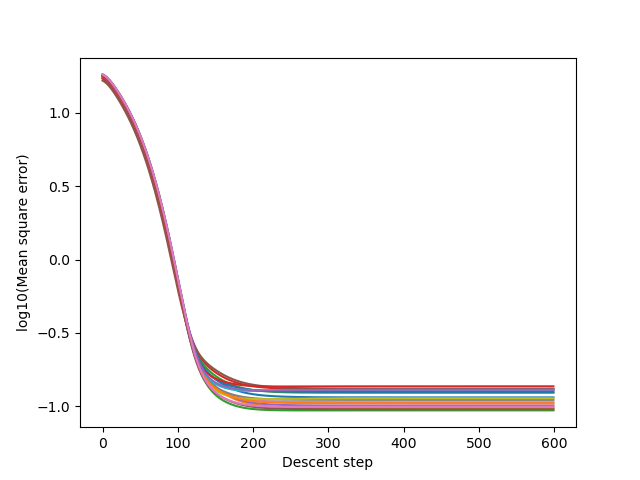

In [6]:
# Plot losses
iq.plot_losses(log=True)

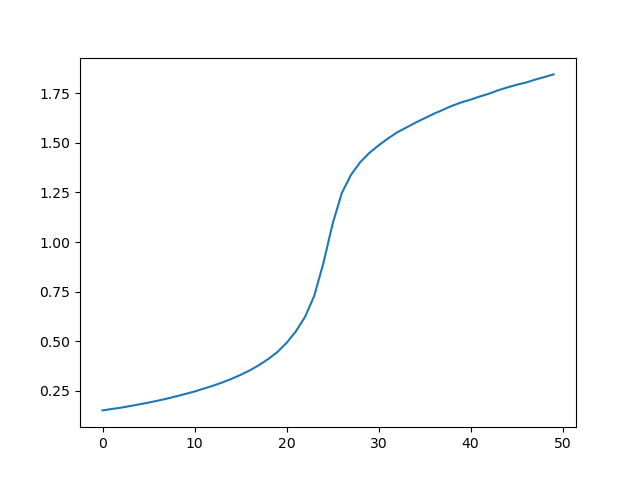

In [7]:
# Plot calibrated cytoplasmic profile
fig, ax = plt.subplots()
ax.plot(iq.cytbg)

In [8]:
# Save
np.savetxt('../../data/calibration_cyt.txt', iq.cytbg)